<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#CAMI2-HMP-gut" data-toc-modified-id="CAMI2-HMP-gut-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>CAMI2 HMP-gut</a></span><ul class="toc-item"><li><span><a href="#LLMGA" data-toc-modified-id="LLMGA-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>LLMGA</a></span><ul class="toc-item"><li><span><a href="#Config" data-toc-modified-id="Config-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Config</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Run</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Stats" data-toc-modified-id="Stats-4.1.3.1"><span class="toc-item-num">4.1.3.1&nbsp;&nbsp;</span>Stats</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#CAMI2-marine" data-toc-modified-id="CAMI2-marine-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>CAMI2 marine</a></span><ul class="toc-item"><li><span><a href="#LLMGA" data-toc-modified-id="LLMGA-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>LLMGA</a></span><ul class="toc-item"><li><span><a href="#Config" data-toc-modified-id="Config-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Config</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Run</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Stats" data-toc-modified-id="Stats-5.1.3.1"><span class="toc-item-num">5.1.3.1&nbsp;&nbsp;</span>Stats</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Assessing change in metaQUAST-defined `genome fraction` pre- and post- ResMiCo filtering
* Using the CAMI2 datasets, which include reference genomes for metaQUAST
* Method: run assembly pipeline, which produces metaQUAST info on pre- and post- filtering

# Var

In [13]:
work_dir = '/ebio/abt3_projects/databases_no-backup/CAMI/'

# Init

In [4]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(tidytable)
library(LeyLabRMisc)

In [5]:
Init()

# CAMI2 HMP-gut

## LLMGA

In [14]:
base_dir = file.path(work_dir, 'CAMI2_HMP-gut', 'short_read', 'LLMGA_genome-frac')

### Config

In [19]:
F = file.path(base_dir, 'config.yaml')
cat_file(F)

#-- I/O --#
# table with sample --> read_file information
samples_file: /ebio/abt3_projects/databases_no-backup/CAMI/CAMI2_HMP-gut/short_read/LLMGA_genome-frac/samples.tsv

# output location
output_dir: /ebio/abt3_projects/databases_no-backup/CAMI/CAMI2_HMP-gut/short_read/LLMGA_genome-frac/

# temporary file directory (your username will be added automatically)
tmp_dir: /ebio/abt3_scratch/

#-- reference genomes for metacompass --#
metacompass_ref: /ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/TUKMZ-BGI250/llmga-find-refs/references/drep/dereplicated_genomes.fna

#-- master control --#
# which major parts of the pipline to run 
run_assembly: True
run_binning: False
run_other_assembly: False

#-- software parameters --#
# Notes:
## see "Notes on the `config.yaml` file" in the README
params:
  # misc
  ionice: -c 3
  use_gpu: True
  # raw reads
  reads:
    subsample: 80000000
    fastqc: ""  
  # metacompass (per-sample ref-based assembly); skipped if using graphbin2
  m

### Run

```
(snakemake) rick: /tmp/global2/nyoungblut/code/dev/ll_pipelines/llmga
$ screen -L -S llmga-genome-frac ./snakemake_sge.sh /ebio/abt3_projects/databases_no-backup/CAMI/CAMI2_HMP-gut/short_read/LLMGA_genome-frac/config.yaml 30 --notemp -F
```

### Summary

In [29]:
# listing files
D = file.path(base_dir, 'final_contigs')
F = list_files(D, 'report.tsv')
F = F[grep('combined_reference/report.tsv', F)]
F %>% length
F %>% head(n=3)

[1] 10

[1] "/ebio/abt3_projects/databases_no-backup/CAMI//CAMI2_HMP-gut/short_read/LLMGA_genome-frac/final_contigs/2017_12_04_18_45_54_sample_0/metaquast/combined_reference/report.tsv" 
[2] "/ebio/abt3_projects/databases_no-backup/CAMI//CAMI2_HMP-gut/short_read/LLMGA_genome-frac/final_contigs/2017_12_04_18_45_54_sample_1/metaquast/combined_reference/report.tsv" 
[3] "/ebio/abt3_projects/databases_no-backup/CAMI//CAMI2_HMP-gut/short_read/LLMGA_genome-frac/final_contigs/2017_12_04_18_45_54_sample_10/metaquast/combined_reference/report.tsv"

In [31]:
# reading tables
read_table = function(F){
    dt = Fread(F)
    dt$Sample = gsub('.+final_contigs/([^/]+)/.+', '\\1', F)
    return(dt)
}
contigs = F %>%
    lapply(read_table) %>%
    rbindlist(use.names=TRUE)
contigs

Assembly,contigs_final,Sample
<chr>,<chr>,<chr>
# contigs (>= 0 bp),11432,2017_12_04_18_45_54_sample_0
# contigs (>= 1000 bp),11432,2017_12_04_18_45_54_sample_0
⋮,⋮,⋮
LA50,1544,2017_12_04_18_45_54_sample_9
LA90,16832,2017_12_04_18_45_54_sample_9


In [32]:
# listing files
D = file.path(base_dir, 'filtered_contigs')
F = list_files(D, 'report.tsv')
F = F[grep('combined_reference/report', F)]
F %>% length
F %>% head(n=3)

[1] 10

[1] "/ebio/abt3_projects/databases_no-backup/CAMI//CAMI2_HMP-gut/short_read/LLMGA_genome-frac/filtered_contigs/2017_12_04_18_45_54_sample_0/metaquast/combined_reference/report.tsv" 
[2] "/ebio/abt3_projects/databases_no-backup/CAMI//CAMI2_HMP-gut/short_read/LLMGA_genome-frac/filtered_contigs/2017_12_04_18_45_54_sample_1/metaquast/combined_reference/report.tsv" 
[3] "/ebio/abt3_projects/databases_no-backup/CAMI//CAMI2_HMP-gut/short_read/LLMGA_genome-frac/filtered_contigs/2017_12_04_18_45_54_sample_10/metaquast/combined_reference/report.tsv"

In [34]:
# reading tables
read_table = function(F){
    dt = Fread(F)
    dt$Sample = gsub('.+filtered_contigs/([^/]+)/.+', '\\1', F)
    return(dt)
}
contigs_filt = F %>%
    lapply(read_table) %>%
    rbindlist(use.names=TRUE)
contigs_filt

Assembly,contigs_filtered,Sample
<chr>,<chr>,<chr>
# contigs (>= 0 bp),11283,2017_12_04_18_45_54_sample_0
# contigs (>= 1000 bp),11283,2017_12_04_18_45_54_sample_0
⋮,⋮,⋮
LA50,1703,2017_12_04_18_45_54_sample_9
LA90,16813,2017_12_04_18_45_54_sample_9


In [56]:
# merging
contigs_j = rbindlist(list(
    contigs %>% 
        rename.('value' = 'contigs_final') %>%
        mutate.(stage = 'contigs (pre-filter)'),
    contigs_filt %>% 
        rename.('value' = 'contigs_filtered') %>%
        mutate.(stage = 'contigs (post-filter)')
    )) %>%
    mutate.(stage = factor(stage, c('contigs (pre-filter)', 'contigs (post-filter)')),
            value = value %>% as.Num)
contigs_j

Warning message in as.Num(.):
“NAs introduced by coercion”


Assembly,value,Sample,stage
<chr>,<dbl>,<chr>,<fct>
# contigs (>= 0 bp),11432,2017_12_04_18_45_54_sample_0,contigs (pre-filter)
# contigs (>= 1000 bp),11432,2017_12_04_18_45_54_sample_0,contigs (pre-filter)
⋮,⋮,⋮,⋮
LA50,1703,2017_12_04_18_45_54_sample_9,contigs (post-filter)
LA90,16813,2017_12_04_18_45_54_sample_9,contigs (post-filter)


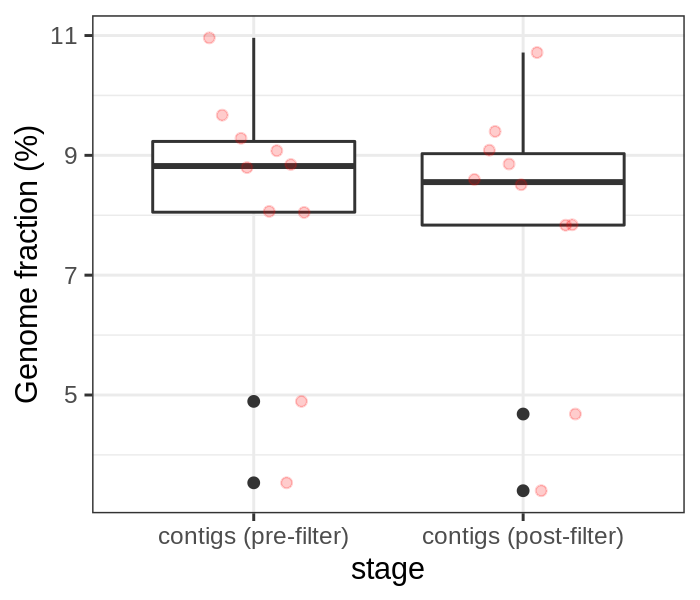

In [57]:
# plotting results
p = contigs_j %>%
    filter.(Assembly == 'Genome fraction (%)') %>%
    ggplot(aes(stage, value)) +
    geom_boxplot() +
    geom_jitter(height=0, width=0.2, alpha=0.2, color='red') +
    labs(y='Genome fraction (%)') +
    theme_bw()
p.dims(3.5,3)
p

#### Stats

In [58]:
wilcox.test(value ~ stage, data=contigs_j)


	Wilcoxon rank sum test with continuity correction

data:  value by stage
W = 85541, p-value = 0.6601
alternative hypothesis: true location shift is not equal to 0


# CAMI2 marine

## LLMGA

In [62]:
base_dir = file.path(work_dir, 'CAMI2_marine', 'short_read', 'LLMGA_genome-frac')
make_dir(base_dir)

Directory already exists: /ebio/abt3_projects/databases_no-backup/CAMI//CAMI2_marine/short_read/LLMGA_genome-frac 


### Config

In [63]:
F = file.path(base_dir, 'config.yaml')
cat_file(F)

#-- I/O --#
# table with sample --> read_file information
samples_file: /ebio/abt3_projects/databases_no-backup/CAMI/CAMI2_marine/short_read/LLMGA_genome-frac/samples.tsv

# output location
output_dir: /ebio/abt3_projects/databases_no-backup/CAMI/CAMI2_marine/short_read/LLMGA_genome-frac/

# temporary file directory (your username will be added automatically)
tmp_dir: /ebio/abt3_scratch/

#-- reference genomes for metacompass --#
metacompass_ref: /ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/TUKMZ-BGI250/llmga-find-refs/references/drep/dereplicated_genomes.fna

#-- master control --#
# which major parts of the pipline to run 
run_assembly: True
run_binning: False
run_other_assembly: False

#-- software parameters --#
# Notes:
## see "Notes on the `config.yaml` file" in the README
params:
  # misc
  ionice: -c 3
  use_gpu: True
  # raw reads
  reads:
    subsample: 80000000
    fastqc: ""  
  # metacompass (per-sample ref-based assembly); skipped if using graphbin2
  met

### Run

```
(snakemake) rick: /tmp/global2/nyoungblut/code/dev/ll_pipelines/llmga
$ screen -L -S llmga-marine ./snakemake_sge.sh /ebio/abt3_projects/databases_no-backup/CAMI/CAMI2_marine/short_read/LLMGA_genome-frac/config.yaml 30
```

### Summary

In [66]:
# listing files
D = file.path(base_dir, 'final_contigs')
F = list_files(D, 'report.tsv')
F = F[grep('combined_reference/report.tsv', F)]
F %>% length
F %>% head(n=3)

[1] 10

[1] "/ebio/abt3_projects/databases_no-backup/CAMI//CAMI2_marine/short_read/LLMGA_genome-frac/final_contigs/2018_08_15_09_49_32_sample_0/metaquast/combined_reference/report.tsv"
[2] "/ebio/abt3_projects/databases_no-backup/CAMI//CAMI2_marine/short_read/LLMGA_genome-frac/final_contigs/2018_08_15_09_49_32_sample_1/metaquast/combined_reference/report.tsv"
[3] "/ebio/abt3_projects/databases_no-backup/CAMI//CAMI2_marine/short_read/LLMGA_genome-frac/final_contigs/2018_08_15_09_49_32_sample_2/metaquast/combined_reference/report.tsv"

In [67]:
# reading tables
read_table = function(F){
    dt = Fread(F)
    dt$Sample = gsub('.+final_contigs/([^/]+)/.+', '\\1', F)
    return(dt)
}
contigs = F %>%
    lapply(read_table) %>%
    rbindlist(use.names=TRUE)
contigs

Assembly,contigs_final,Sample
<chr>,<chr>,<chr>
# contigs (>= 0 bp),34991,2018_08_15_09_49_32_sample_0
# contigs (>= 1000 bp),34991,2018_08_15_09_49_32_sample_0
⋮,⋮,⋮
LA50,-,2018_08_15_09_49_32_sample_9
LA90,-,2018_08_15_09_49_32_sample_9


In [68]:
# listing files
D = file.path(base_dir, 'filtered_contigs')
F = list_files(D, 'report.tsv')
F = F[grep('combined_reference/report', F)]
F %>% length
F %>% head(n=3)

[1] 10

[1] "/ebio/abt3_projects/databases_no-backup/CAMI//CAMI2_marine/short_read/LLMGA_genome-frac/filtered_contigs/2018_08_15_09_49_32_sample_0/metaquast/combined_reference/report.tsv"
[2] "/ebio/abt3_projects/databases_no-backup/CAMI//CAMI2_marine/short_read/LLMGA_genome-frac/filtered_contigs/2018_08_15_09_49_32_sample_1/metaquast/combined_reference/report.tsv"
[3] "/ebio/abt3_projects/databases_no-backup/CAMI//CAMI2_marine/short_read/LLMGA_genome-frac/filtered_contigs/2018_08_15_09_49_32_sample_2/metaquast/combined_reference/report.tsv"

In [69]:
# reading tables
read_table = function(F){
    dt = Fread(F)
    dt$Sample = gsub('.+filtered_contigs/([^/]+)/.+', '\\1', F)
    return(dt)
}
contigs_filt = F %>%
    lapply(read_table) %>%
    rbindlist(use.names=TRUE)
contigs_filt

Assembly,contigs_filtered,Sample
<chr>,<chr>,<chr>
# contigs (>= 0 bp),34224,2018_08_15_09_49_32_sample_0
# contigs (>= 1000 bp),34224,2018_08_15_09_49_32_sample_0
⋮,⋮,⋮
LA50,-,2018_08_15_09_49_32_sample_9
LA90,-,2018_08_15_09_49_32_sample_9


In [70]:
# merging
contigs_j = rbindlist(list(
    contigs %>% 
        rename.('value' = 'contigs_final') %>%
        mutate.(stage = 'contigs (pre-filter)'),
    contigs_filt %>% 
        rename.('value' = 'contigs_filtered') %>%
        mutate.(stage = 'contigs (post-filter)')
    )) %>%
    mutate.(stage = factor(stage, c('contigs (pre-filter)', 'contigs (post-filter)')),
            value = value %>% as.Num)
contigs_j

Warning message in as.Num(.):
“NAs introduced by coercion”


Assembly,value,Sample,stage
<chr>,<dbl>,<chr>,<fct>
# contigs (>= 0 bp),34991,2018_08_15_09_49_32_sample_0,contigs (pre-filter)
# contigs (>= 1000 bp),34991,2018_08_15_09_49_32_sample_0,contigs (pre-filter)
⋮,⋮,⋮,⋮
LA50,NA,2018_08_15_09_49_32_sample_9,contigs (post-filter)
LA90,NA,2018_08_15_09_49_32_sample_9,contigs (post-filter)


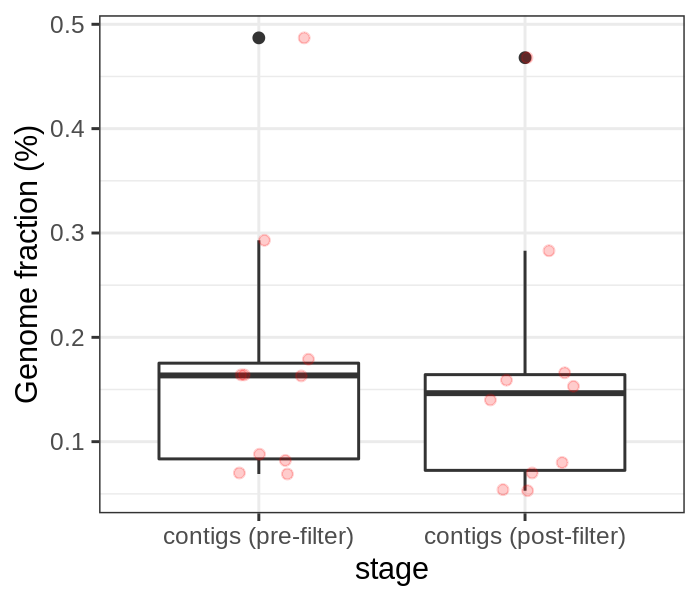

In [71]:
# plotting results
p = contigs_j %>%
    filter.(Assembly == 'Genome fraction (%)') %>%
    ggplot(aes(stage, value)) +
    geom_boxplot() +
    geom_jitter(height=0, width=0.2, alpha=0.2, color='red') +
    labs(y='Genome fraction (%)') +
    theme_bw()
p.dims(3.5,3)
p

#### Stats

In [74]:
wilcox.test(value ~ stage, data=contigs_j)


	Wilcoxon rank sum test with continuity correction

data:  value by stage
W = 69666, p-value = 0.6758
alternative hypothesis: true location shift is not equal to 0


# sessionInfo

In [49]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.5 LTS

Matrix products: default
BLAS/LAPACK: /tmp/global2/nyoungblut/code/general/conda_envs/general-tidyverse/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] clustermq_0.8.95.2 LeyLabRMisc_0.2.1  tidytable_0.6.6    data.table_1.14.2 
[5] ggplot2_3.3.5      tidyr_1.1.4        dplyr_1.0.7       

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.7       plyr_1.8.6       pillar_1.6.4     compiler_4.1.1  
 [5] base64enc_0